In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [72]:
g = 9.81

In [75]:
data = [np.genfromtxt(entry.path, delimiter=',') 
            for entry in os.scandir("measurements") 
            if entry.is_file() and entry.path.endswith(".csv")]
# data = np.genfromtxt("measurements/952Hz_2g.csv", delimiter=',')

fs = 952
quan_noise = (4/2**12*g)**2/6/fs

f, Pxx_den = signal.welch(data, fs, nperseg=4096, axis=0)
Axx_den = np.sqrt(Pxx_den)
omega = 2*np.pi*f[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

for i, label in enumerate(labels):
    plt.loglog(f[1:], Axx_den[1:, i]*mag, '-',label=label+ ": 2g")
plt.loglog(f[1:], np.sqrt(quan_noise)*mag, label='quan_noise: 2g, 952Hz')

plt.ylabel(r'ASD[m/$\sqrt{Hz}]$')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.grid()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

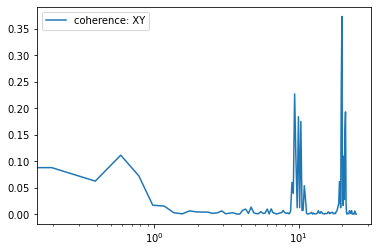

In [23]:
f_xy, cohXY = signal.coherence(averaged[:,0], averaged[:,1], fs=fs, nperseg=256)

plt.semilogx(f_xy, cohXY, label='coherence: XY')
plt.legend()